In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [56]:
dataset = pd.read_csv("./csvs/House Prices (1).csv")
dataset = dataset.select_dtypes(include='number')
dataset.count()

ID               21613
Price            21613
Bedrooms         21613
Bathrooms        21613
Sqft_living      21613
Sqft_lot         21613
Floors           21613
Waterfront       21613
View             21613
Condition        21613
Grade            21613
Sqft_above       21613
Sqft_basement    21613
Yr_built         21613
Yr_renovated     21613
zipcode          21613
Lat              21613
Long             21613
Sqft_living15    21613
Sqft_lot15       21613
dtype: int64

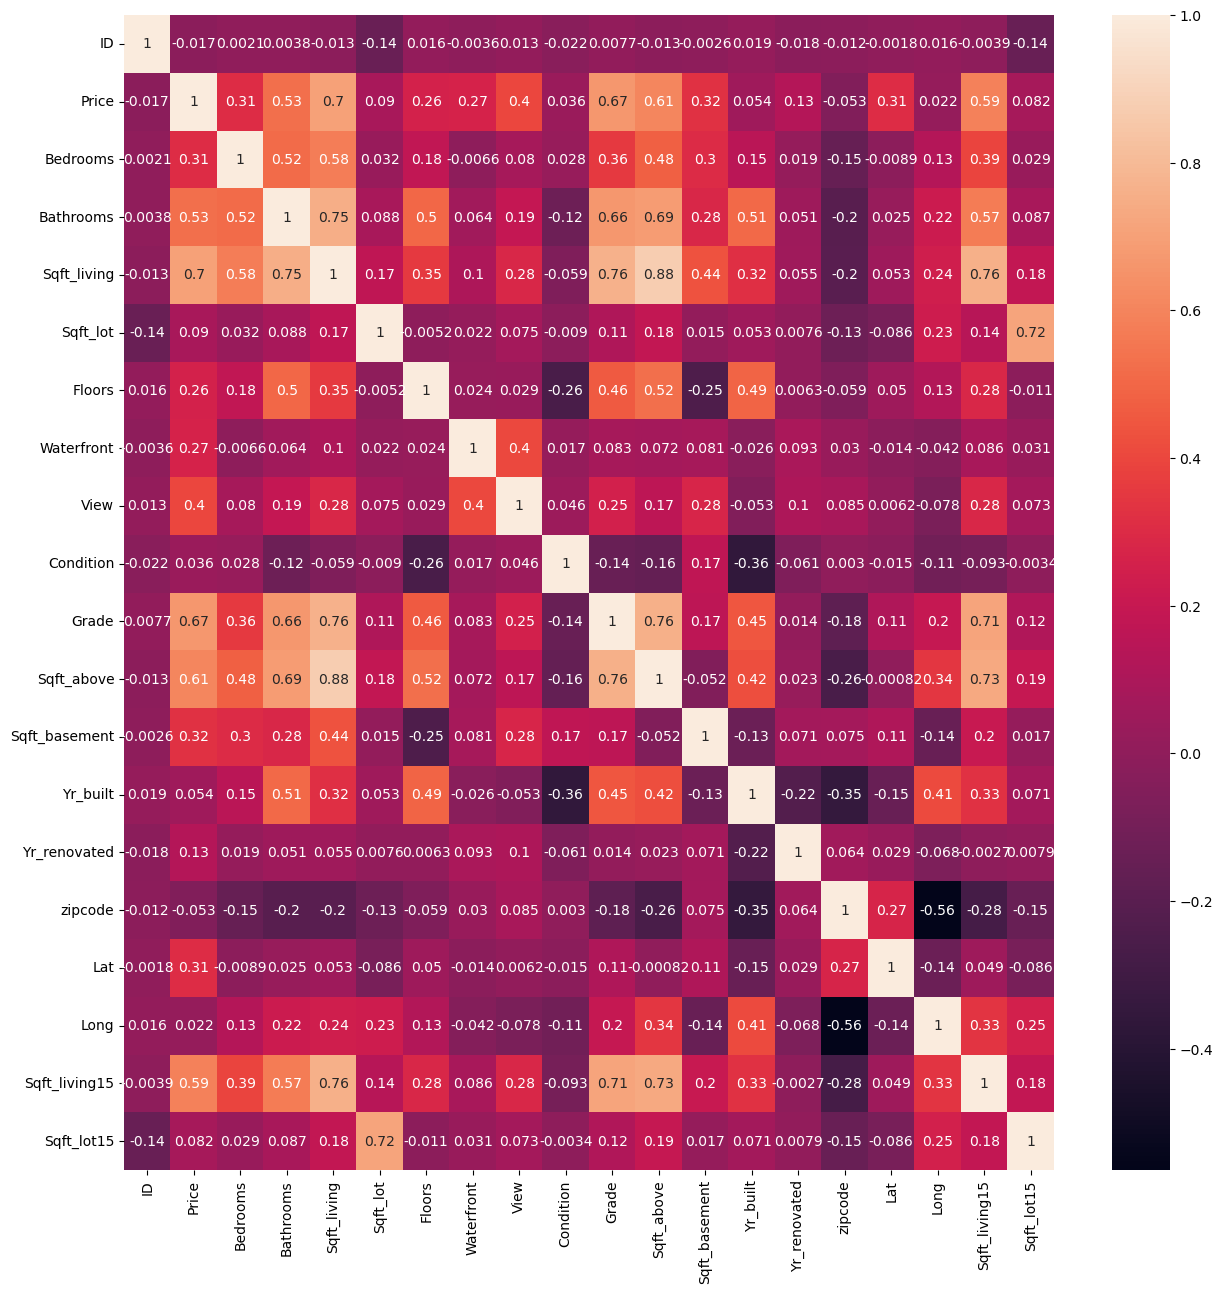

In [57]:
plt.figure(figsize=(15,15))
sns.heatmap(data=dataset.corr(), annot=True)
plt.show()

In [58]:
x = dataset.iloc[:, :-1]
y = dataset["Sqft_living15"]
# x
x.iloc[4]   

ID                    5.0000
Price            235000.0000
Bedrooms              3.0000
Bathrooms             1.0000
Sqft_living        1430.0000
Sqft_lot           7599.0000
Floors                1.5000
Waterfront            0.0000
View                  0.0000
Condition             4.0000
Grade                 6.0000
Sqft_above         1010.0000
Sqft_basement       420.0000
Yr_built           1930.0000
Yr_renovated          0.0000
zipcode           98168.0000
Lat                  47.4783
Long               -122.2650
Sqft_living15      1290.0000
Name: 4, dtype: float64

In [59]:
x

,ID,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,Condition,Grade,Sqft_above,Sqft_basement,Yr_built,Yr_renovated,zipcode,Lat,Long,Sqft_living15
0,1,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060
1,2,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060
2,3,647500.0,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,0,98166,47.4444,-122.351,2590
3,4,400000.0,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,47.4434,-122.347,2250
4,5,235000.0,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,98168,47.4783,-122.265,1290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21609,365000.0,5,2.00,1600,4168,1.5,0,0,3,7,1600,0,1927,0,98126,47.5297,-122.381,1190
21609,21610,380000.0,2,1.00,1040,7372,1.0,0,0,5,7,840,200,1939,0,98126,47.5285,-122.378,1930
21610,21611,339000.0,3,1.00,1100,4128,1.0,0,0,4,7,720,380,1942,0,98126,47.5296,-122.379,1510
21611,21612,399900.0,2,1.75,1410,1005,1.5,0,0,3,9,900,510,2011,0,98027,47.5446,-122.018,1440


In [60]:
sc = StandardScaler()
sc.fit(x)
sc.transform(x)

array([[-1.73197067e+00, -7.08260555e-01,  2.82692947e+00, ...,
        -1.68772855e+00, -7.35629302e-04,  1.07163904e-01],
       [-1.73181039e+00, -6.53817117e-01,  2.82692947e+00, ...,
        -1.68772855e+00, -7.35629302e-04,  1.07163904e-01],
       [-1.73165011e+00,  2.92137609e-01,  6.76485059e-01, ...,
        -8.34671609e-01, -9.73573676e-01,  8.80462687e-01],
       ...,
       [ 1.73165011e+00, -5.47652414e-01, -3.98737149e-01, ...,
        -2.19777774e-01, -1.17240189e+00, -6.95315966e-01],
       [ 1.73181039e+00, -3.81872147e-01, -1.47395936e+00, ...,
        -1.11521818e-01,  1.39106187e+00, -7.97449767e-01],
       [ 1.73197067e+00, -7.38340554e-01, -3.98737149e-01, ...,
        -6.52079895e-01, -9.73573676e-01, -1.43943366e+00]])

In [61]:
x = pd.DataFrame(sc.transform(x), columns=x.columns)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [63]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [64]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [65]:
lr.score(x_test, y_test)*100

100.0

In [68]:
lr.predict(X=[x.iloc[3]])

f:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2250.])

LinearRegression

In [90]:
print(mean_squared_error(y_test, lr.predict(x_test)))
print(mean_absolute_error(y_test, lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))

6.038249251684702e-24
1.8805007413739525e-12
2.4572849349810252e-12


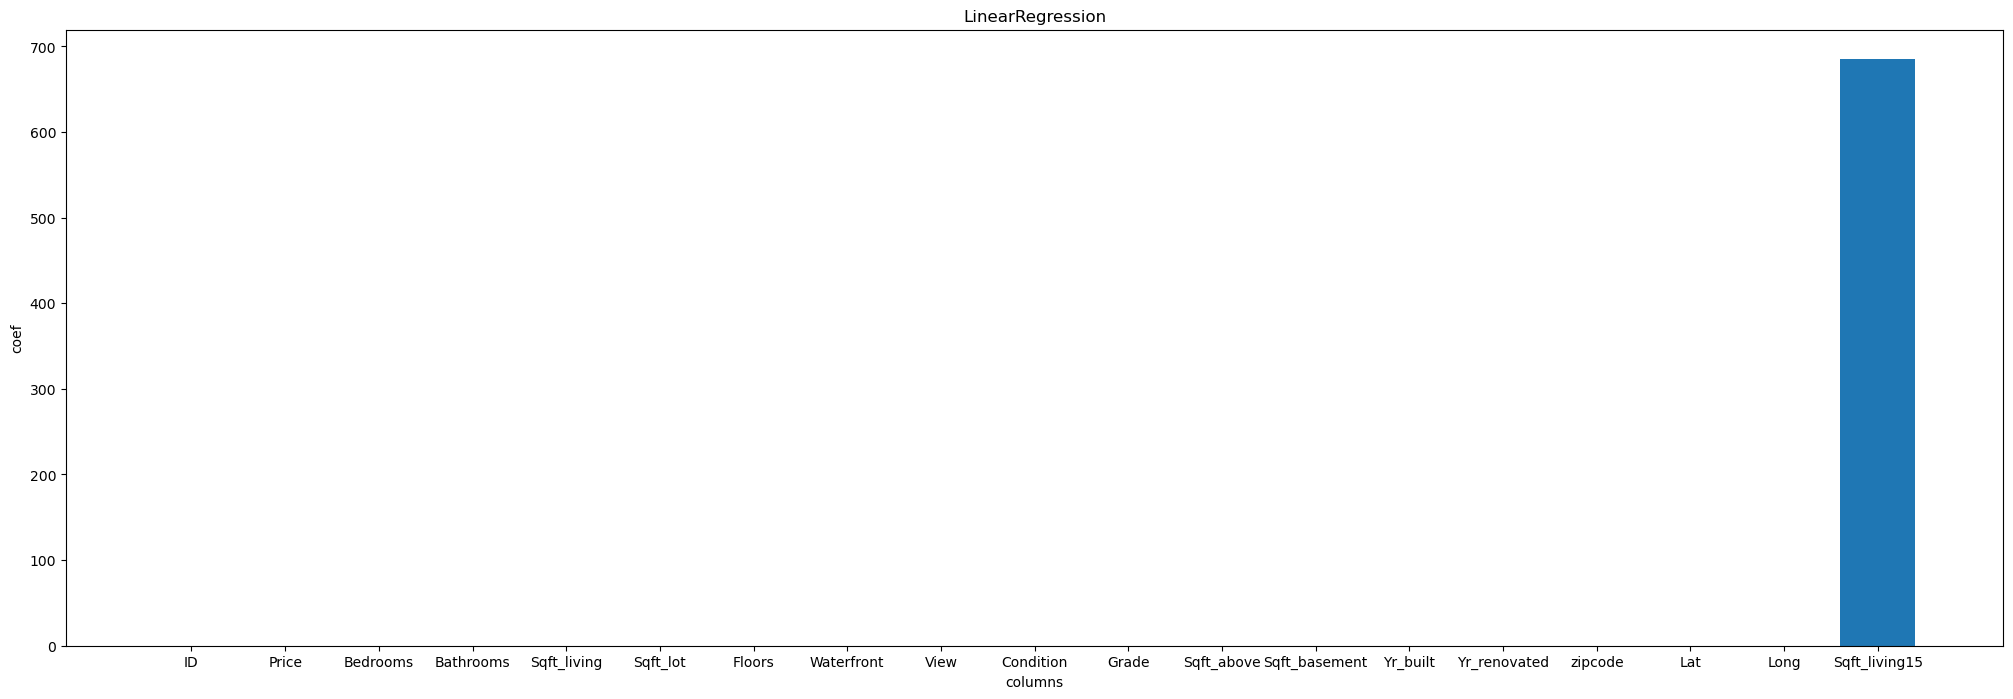

In [78]:

plt.figure(figsize=(25,8))
plt.bar(x.columns, lr.coef_)
plt.title("LinearRegression")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()


Lasso


la = Lasso(alpha = 0.5)

In [84]:
la = Lasso(alpha=0.001)
la.fit(x_train, y_train)
la.score(x_test, y_test)

0.99999997135106

In [92]:
print(mean_squared_error(y_test, la.predict(x_test)))
print(mean_absolute_error(y_test, la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, la.predict(x_test))))

0.013446228050152734
0.08877855004495505
0.11595787187661187


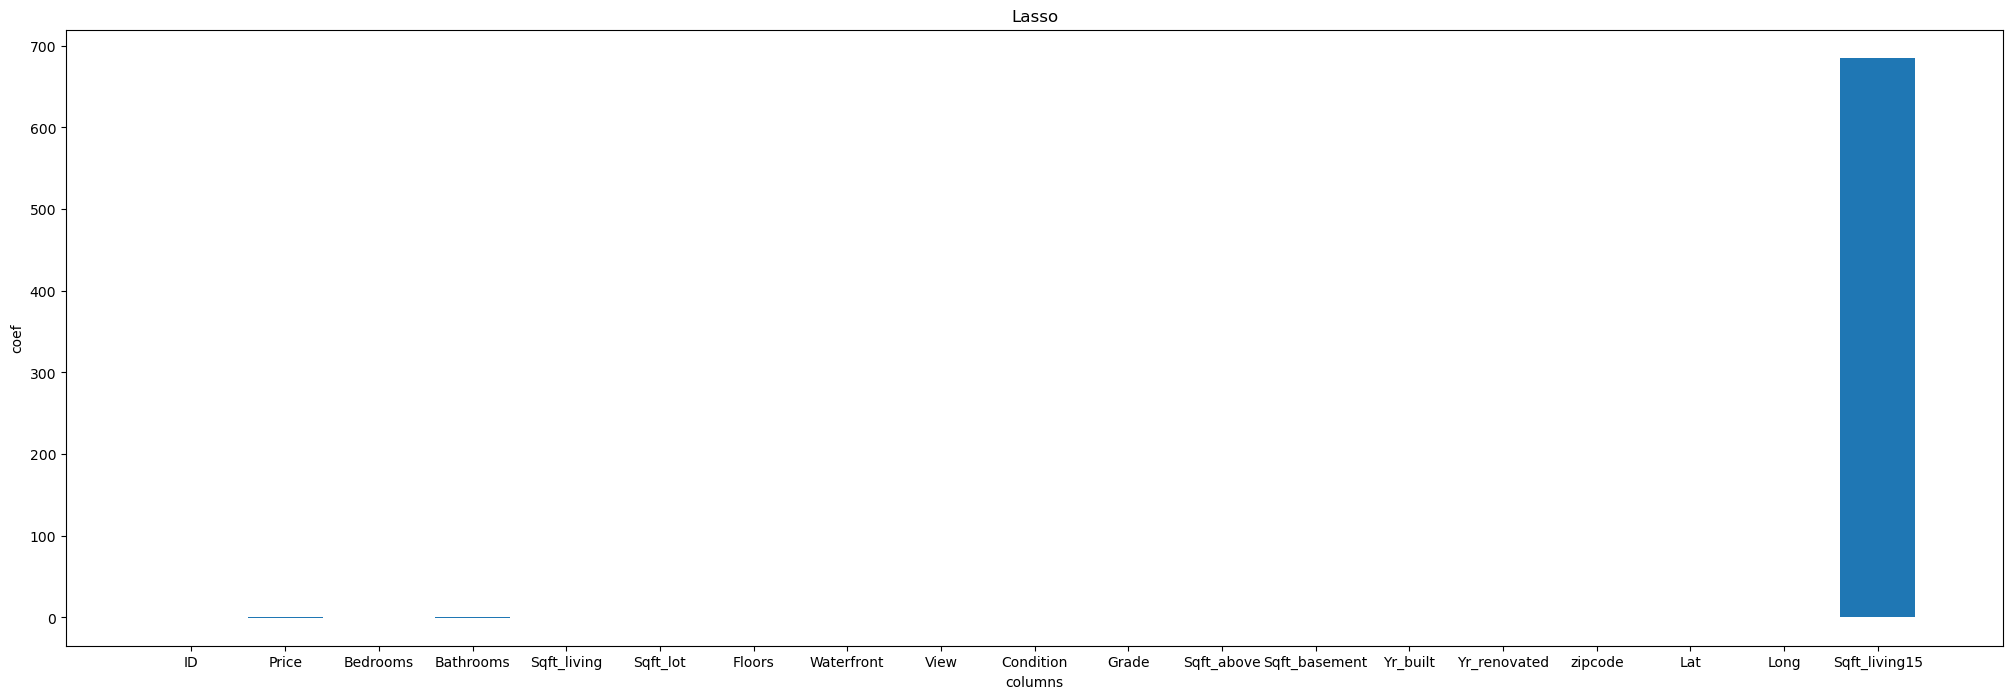

In [85]:
plt.figure(figsize=(25,8))
plt.bar(x.columns, la.coef_)
plt.title("Lasso")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()


Ridge

In [86]:
rd = Ridge(alpha=0.5)

In [87]:
rd.fit(x_train, y_train)
rd.score(x_test, y_test)

0.999999997430984

In [93]:
print(mean_squared_error(y_test, rd.predict(x_test)))
print(mean_absolute_error(y_test, rd.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, rd.predict(x_test))))

0.001205754025904653
0.025769899899746485
0.034723969040198345


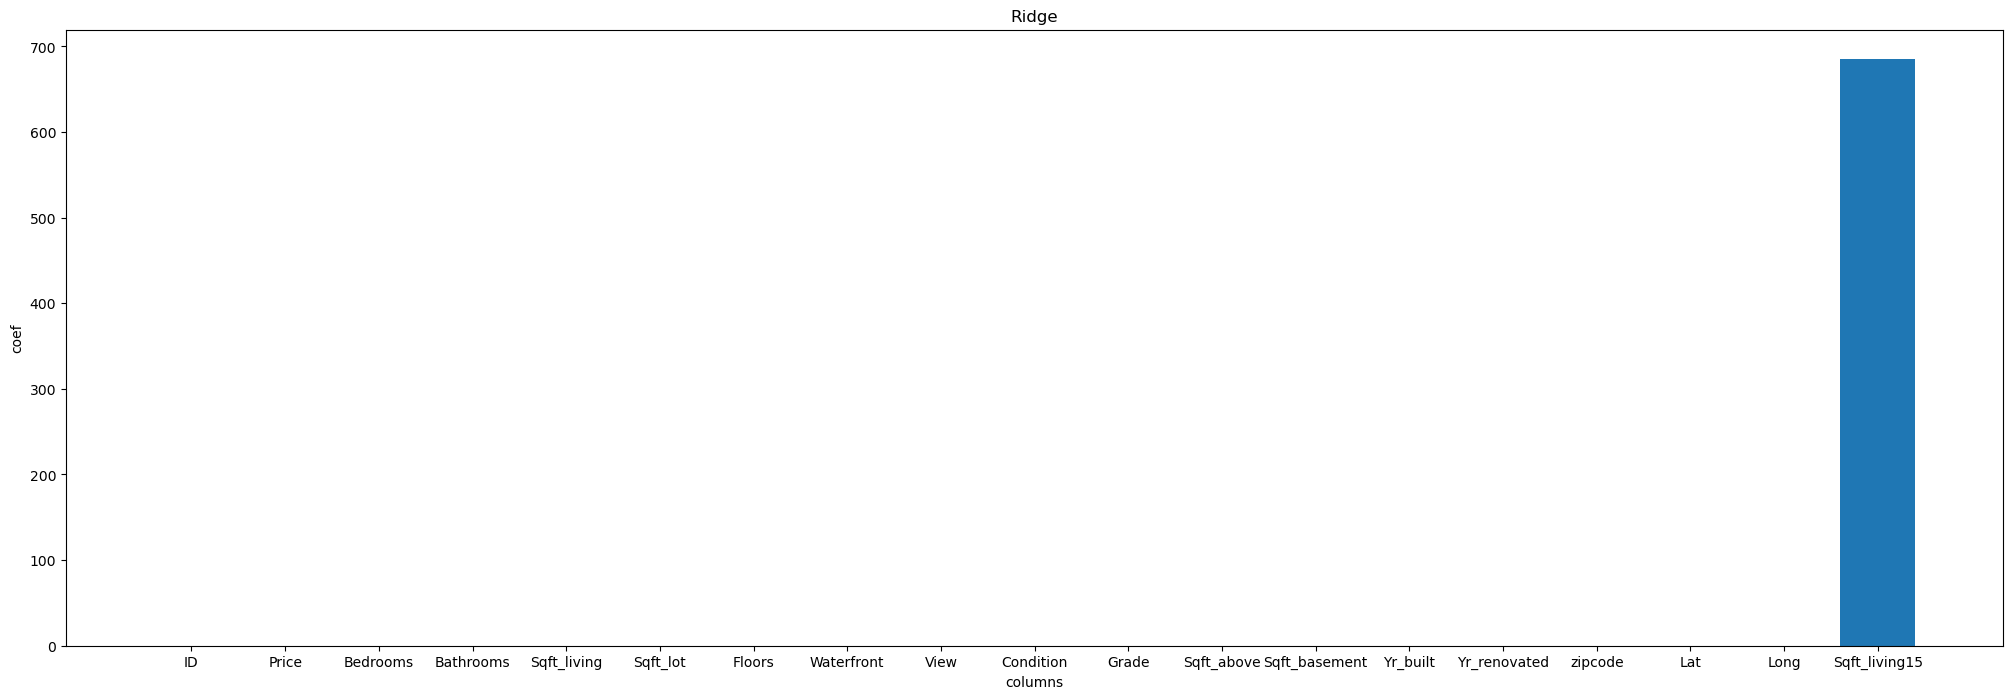

In [88]:
plt.figure(figsize=(25,8))
plt.bar(x.columns, rd.coef_)
plt.title("Ridge")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()


In [95]:
df = pd.DataFrame({"col_name":x.columns, "LinearRegression": lr.coef_, "Lasso":la.coef_, "Ridge":rd.coef_})
df

,col_name,LinearRegression,Lasso,Ridge
0,ID,6.657515e-14,-0.001180,-0.000359
1,Price,-3.427144e-13,-0.081081,0.001425
2,Bedrooms,8.744951e-13,0.013789,-0.000254
3,Bathrooms,2.877246e-13,-0.165435,-0.002005
4,Sqft_living,-2.506765e-13,0.126173,0.015182
5,Sqft_lot,3.522300e-13,-0.000250,-0.001467
6,Floors,-1.453639e-12,0.018572,-0.005441
7,Waterfront,1.572388e-13,0.008926,-0.001206
8,View,4.737565e-13,0.008537,0.006476
9,Condition,5.383902e-13,0.012900,-0.001436
